## Amazon Sales Data Recommender System

The data used for this project was obtained from:

Karkavelrajaj. (n.d.). Amazon sales dataset. Kaggle. https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data

The aim of this project is to first perform exploratory data analysis on the data set to see what features may be ideal for building a recommender system that can recommend products based on previously bought products. The recommender system will be buil using unsupervised machine learning techniques. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path= r"C:\Users\klime\OneDrive\Documents\amazon.csv"
data  = pd.read_csv(file_path)


## Data Preprocessing

In [2]:
print("********Shape of my Data*************")
print(data.shape)

print("********Number of NAs in Data**************")
print(data.isna().sum())
      
print("********Number of Duplicates in Data**********")
print(data.duplicated().sum())


********Shape of my Data*************
(1465, 16)
********Number of NAs in Data**************
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64
********Number of Duplicates in Data**********
0


### Data Preprocessing and Cleaning

This code focuses on specific ways to handle price and rating information. The clean_price and clean_discounted_price functions remove extra characters like the currency symbol (₹) and commas from price strings. After cleaning, these strings are turned into floating-point numbers, making it easier to perform calculations. The clean_discount_percentage function works similarly by removing the percentage sign (%) and converting the cleaned values into integers, which allows for straightforward mathematical operations.

Besides cleaning price data, the code also handles the rating and rating_count columns. For ratings, it uses pd.to_numeric to change values into a numeric format, turning any non-numeric entries into NaN (not a number), which are then dropped from the dataset. The rating_count column goes through a similar process, where commas are removed, and values are checked for 'nan' before converting them into integers. This thorough cleaning helps ensure the DataFrame is neat and ready for further analysis, leading to more accurate results and insights.

In [3]:
def clean_price(price_series):
    cleaned_prices = []
    for price in price_series:
        price_str = str(price).replace('₹', '').replace(',', '')
        cleaned_prices.append(float(price_str))
    return cleaned_prices

def clean_discounted_price(price_series):
    cleaned_prices = []
    for price in price_series:
        price_str = str(price).replace('₹', '').replace(',', '')
        cleaned_prices.append(float(price_str))
    return cleaned_prices

def clean_discount_percentage(percentage_series):
    cleaned_percentages = []
    for percentage in percentage_series:
        percentage_str = str(percentage).replace('%', '')
        cleaned_percentages.append(int(percentage_str))
    return cleaned_percentages

data['actual_price'] = clean_price(data['actual_price'])
data['discounted_price'] = clean_discounted_price(data['discounted_price'])
data['discount_percentage'] = clean_discount_percentage(data['discount_percentage'])

data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data = data.dropna(subset=['rating'])
data['rating'] = data['rating'].astype(float)

cleaned_rating_counts = []
for value in data['rating_count']:
    cleaned_value = str(value).replace(",", "")
    if cleaned_value != 'nan':  
        cleaned_rating_counts.append(int(cleaned_value))
    else:
        cleaned_rating_counts.append(None)  

data['rating_count'] = cleaned_rating_counts    

print(data.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                   64     4.2       24269.0   
1         349.0       

### Visualization of Numerical Data Metrics

As can be seen below, in the bar charts of how often certain discounted prices, actual prices, discounted percentages, and rating counts-- the distributions are not very evenly dispersed. It appears that these plots show lots of skew and this may indicate that these features would not be ideal for the recommender system model as the data is heavily unblanaced. 

On the other hand, plot of ratings is much more uniformly dispersed which indicates that rating could be a good feature to utilize in the model. 

The box plots below also confirm that there is a lot of skew in the charts for the discounted prices, actual prices, discounted percentages, and rating counts features. However, rating shows a much more even spread. 

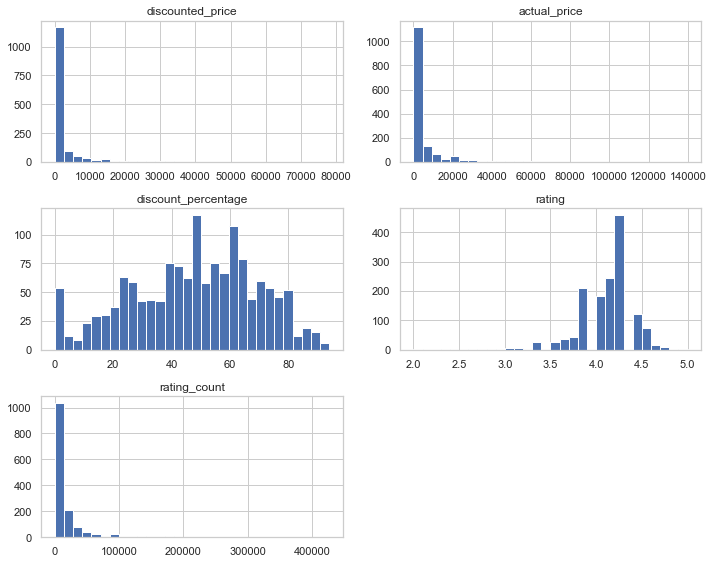

In [4]:
import seaborn as sns

sns.set(style='whitegrid')

data.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()



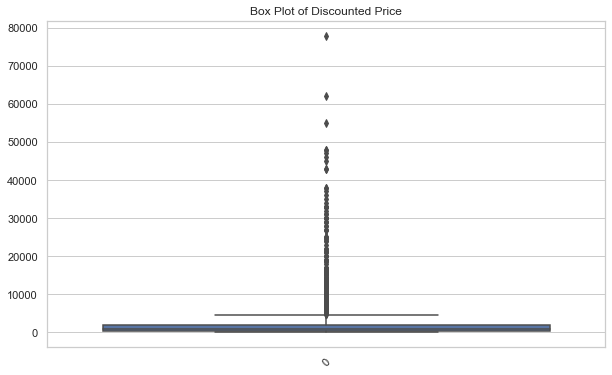

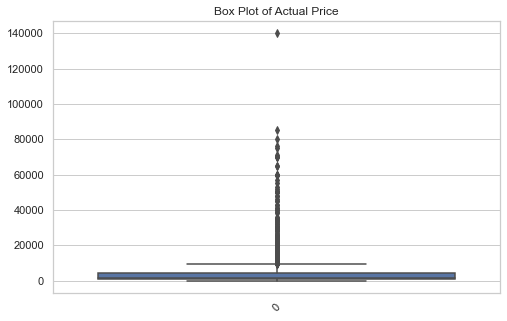

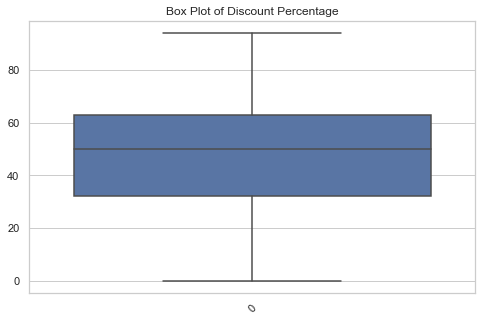

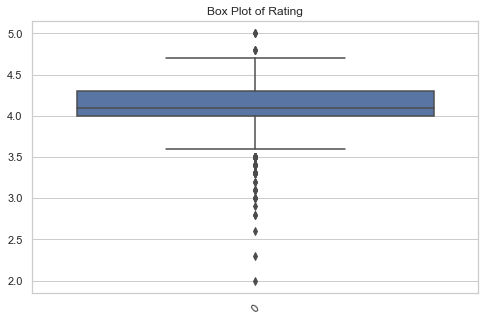

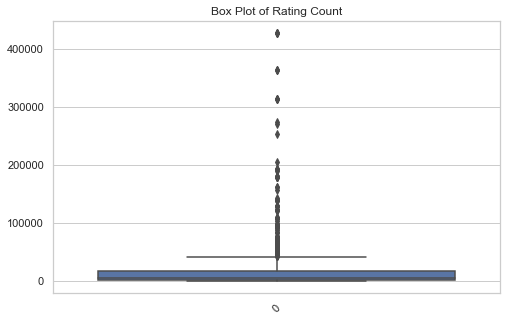

In [5]:
# Box plots for numeric columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data['discounted_price'])
plt.xticks(rotation=45)
plt.title('Box Plot of Discounted Price')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=data['actual_price'])
plt.xticks(rotation=45)
plt.title('Box Plot of Actual Price')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=data["discount_percentage"])
plt.xticks(rotation=45)
plt.title('Box Plot of Discount Percentage')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=data['rating'])
plt.tight_layout
plt.xticks(rotation=45)
plt.title('Box Plot of Rating')
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(data=data["rating_count"])
plt.xticks(rotation=45)
plt.title('Box Plot of Rating Count')
plt.show()


### Correlation Matrix for Numerical Features

A correlation matrix was also generated for the numerical features to examine whether there were any strongly correlated features that could be redundant to include in the model. 

From the matrix it can be seen that a large portion of the numerical features appear relatively uncorrelated, outside of actual_price and discounted_price. 

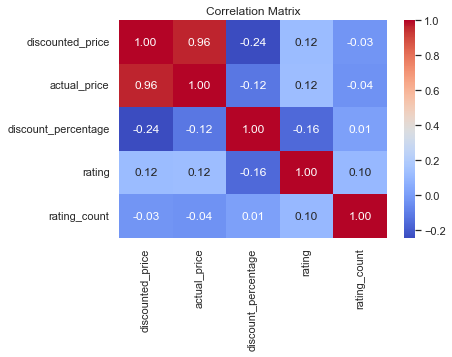

In [6]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Analysis of Numerical Features 

Because of the large skew in the feature frequencies, it may not be beneficial to use the inherently numerical features present in the data set to create this model. The data imbalance may sway the nature of the recommender model to recommend based on how frequently the item appeared as opposed to how similar it is to an item. As this is not meant to be a popularity-based recommendtion system, the features discounted prices, actual prices, discounted percentages, and rating counts will not be used to model the sytem. 

### Investigation of Categorical Features

Next a bar plot of the categories was created to see if the categories would be an ideal feature to recommend on. The categories, are not evenly dispersed but can be assumed to be a very good metric for determining how similar different products are. Therefore, they will be used in the recommender system.

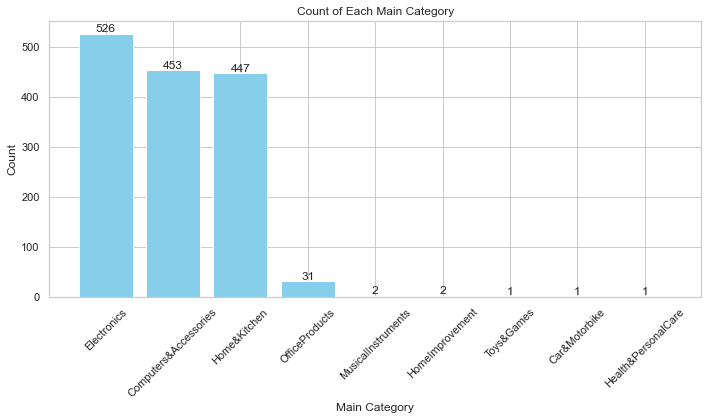

In [7]:
data_copy = data.copy()

main_cats = []
for cat in data_copy['category']:
    main_cats.append(cat.split("|")[0])
    
main_cat_counts = pd.Series(main_cats).value_counts()
    
main_cat_counts = pd.Series(main_cats).value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(main_cat_counts.index, main_cat_counts.values, color='skyblue')

plt.title('Count of Each Main Category')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()


## Collaborative and Content Based Rating Based on Reviews

For the recommender system, it was decided that that the text data would be used to train the model. Specifically the features 'product_name', 'category', 'about_product', 'review_content' would be used to judge how similar items were and also recommend based on how positive the rating was. This will create a recommender system that works as a hybrid model utilizing both collaborative filtering to distinguish product similarities and content-based recommendations to combine ratings into deterimining which product to recommend.

### Data Pre-Processing for Collaborative Filtering and Content Based Rating

First multiple text fields are combined (product_name, category, about_product, and review_content) into a single string for each product. Next the TfidfVectorizer from sklearn is used to convert the words into a TF-IDF Matrix. 

TF-IDF is a numerical statistic that shows the weight of a word within one of the texts relative to the collection of all the text samples. 

The TF stands for Term Frequency and is calculated by:

TF*(t,d)* = (Number of times term t appears in text d)/(Total terms in text d)

The IDF stands for Inverse Document Frequency, this measures how much weight the word has across all of product texts and helps eliminate impact of non-impacftul words IDF is calculated by: 

IDF*(t,D)* = log((Total number of texts D)/(Number of texts containing t))


Next the cosine similarity matrix is computed to maeasure similarity between products based on their text contents. This is necessary for the content based filtering portion of this recommendation system.

In [8]:
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

data['combined_text'] = data[['product_name', 'category', 'about_product', 'review_content']].fillna('').agg(' '.join, axis=1)
    
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
tfidf_matrix = vectorizer.fit_transform(data['combined_text'])

cosine_sim_matrix = cosine_similarity(tfidf_matrix)
  

### Building the Recommender System Class

The ProductRecommender class is designed to provide product recommendations by leveraging both content and user ratings. The init method sets up the class with the product data and a cosine similarity matrix, which quantifies the similarity between product descriptions. 

The classify_sentiment method evaluates the sentiment of review text using the TextBlob library, categorizing it as positive, negative, or neutral based on its polarity score. The process_data method applies sentiment classification to the review content and encodes these sentiments into numerical values for analysis. 

The fit method creates a user-product matrix that averages ratings for each product, filling in any missing values using forward-filling. Finally, the recommend method provides product recommendations based on a specified product ID, combining content-based recommendations (derived from the cosine similarity matrix) with collaborative recommendations (based on user ratings), and returns the recommended products along with their IDs and names.

In [9]:
class ProductRecommender:
    def __init__(self, data, cosine_sim_matrix):
        self.data = data
        self.cosine_sim_matrix = cosine_sim_matrix
        self.product_user_matrix = None

    def classify_sentiment(self, text):
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0.1:
            return 'Positive'
        elif polarity < -0.1:
            return 'Negative'
        return 'Neutral'

    def process_data(self):
        self.data['sentiment'] = self.data['review_content'].apply(self.classify_sentiment)
        self.data['encoded_sentiment'] = self.data['sentiment'].astype('category').cat.codes

    def fit(self):
        self.product_user_matrix = self.data.pivot_table(index='product_id', values='rating', aggfunc='mean').fillna(method='ffill')

    def recommend(self, product_id, top_n=10):
        idx = self.data.index[self.data['product_id'] == product_id][0]
    
        sim_scores = sorted(enumerate(self.cosine_sim_matrix[idx]), key=lambda x: x[1], reverse=True)
        content_recommendations = [self.data['product_id'].iloc[i[0]] for i in sim_scores[1:top_n + 1]]

        collaborative_recommendations = []
        if product_id in self.product_user_matrix.index:
            current_rating = self.product_user_matrix.loc[product_id].values[0]
            similar_products = self.product_user_matrix.iloc[(self.product_user_matrix['rating'] - current_rating).abs().argsort()[:top_n]]
            collaborative_recommendations = similar_products.index.tolist()

        combined_ids = list(set(content_recommendations + collaborative_recommendations))

        return self.data[self.data['product_id'].isin(combined_ids)][['product_id', 'product_name', 'rating']]

    
        

### Evaluating and testing the Recommender System

Next the ProdctRecommender class is tested using product information and a similarity matrix, which helps suggest similar products based on reviews and ratings. First, it processes the data to analyze the feelings expressed in the reviews and to categorize these feelings. Then, it builds a table that shows average ratings for each product. Finally, the recommender finds and displays recommendations for five different products by their IDs, showing similar products along with their names and ratings. This helps users discover related items based on what they’re interested in.

In [10]:
recommender = ProductRecommender(data, cosine_sim_matrix)  
recommender.process_data()  
recommender.fit()  

sample_product_id = data['product_id'].iloc[5]
recommended_products = recommender.recommend(sample_product_id)
print(f"Recommendations for product ID {sample_product_id}:")
print(recommended_products.head())

sample_product_id = data['product_id'].iloc[57]
recommended_products = recommender.recommend(sample_product_id)
print(f"Recommendations for product ID {sample_product_id}:")
print(recommended_products.head())

sample_product_id = data['product_id'].iloc[100]
recommended_products = recommender.recommend(sample_product_id)
print(f"Recommendations for product ID {sample_product_id}:")
print(recommended_products.head())

Recommendations for product ID B08Y1TFSP6:
     product_id                                       product_name  rating
2    B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...     3.9
5    B08Y1TFSP6  pTron Solero TB301 3A Type-C Data and Fast Cha...     3.9
34   B0B4HJNPV4  pTron Solero T351 3.5Amps Fast Charging Type-C...     3.9
35   B08Y1SJVV5  pTron Solero MB301 3A Micro USB Data & Chargin...     3.9
109  B08Y5KXR6Z  PTron Solero T241 2.4A Type-C Data & Charging ...     3.9
Recommendations for product ID B09Q5SWVBJ:
    product_id                                       product_name  rating
24  B0B1YVCJ2Y  Acer 80 cm (32 inches) I Series HD Ready Andro...     4.3
26  B08B42LWKN  OnePlus 80 cm (32 inches) Y Series HD Ready LE...     4.2
38  B0B3MMYHYW  OnePlus 126 cm (50 inches) Y Series 4K Ultra H...     4.2
53  B07MKFNHKG  VW 80 cm (32 inches) Frameless Series HD Ready...     4.2
63  B01GGKZ0V6  AmazonBasics USB Type-C to USB Type-C 2.0 Cabl...     4.2
Recommendations for 